In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Завдання 1
df = pd.read_csv("bikes_rent.csv")
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed(mph),windspeed(ms),cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,4.805490,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,7.443949,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,7.437060,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,4.800998,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,5.597810,1600


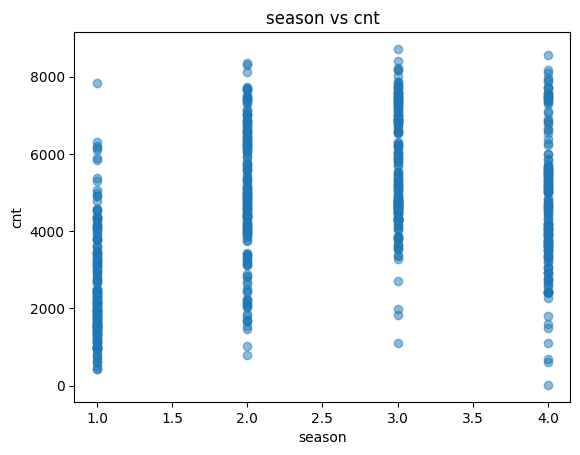

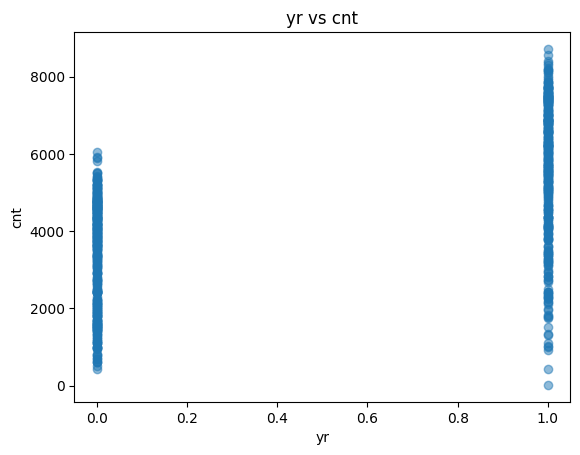

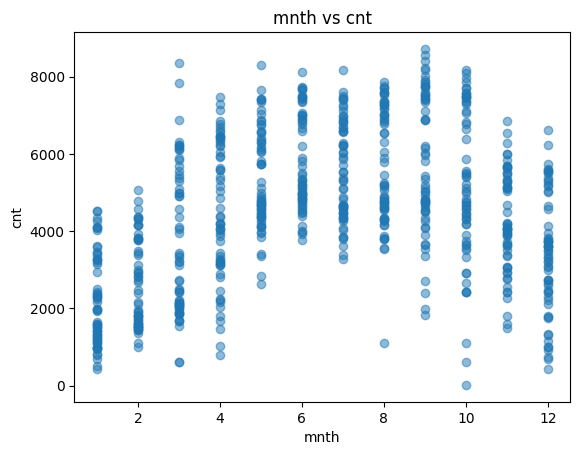

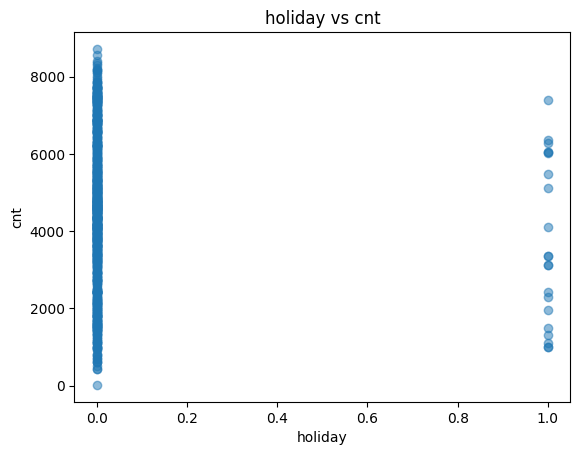

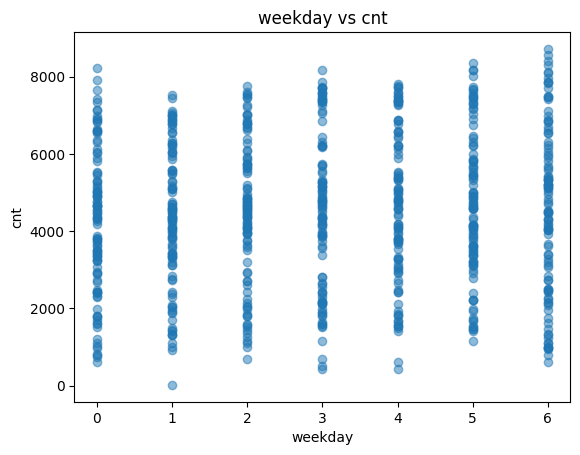

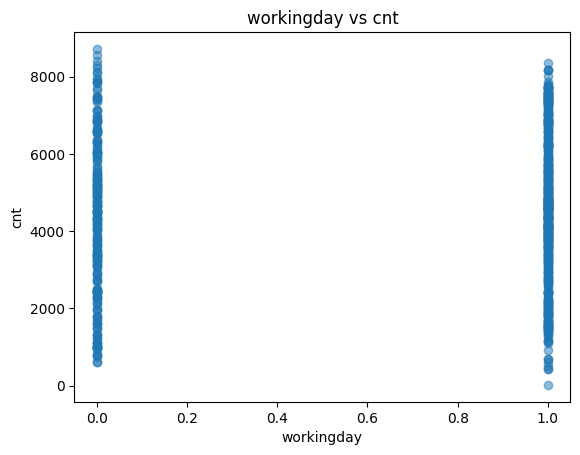

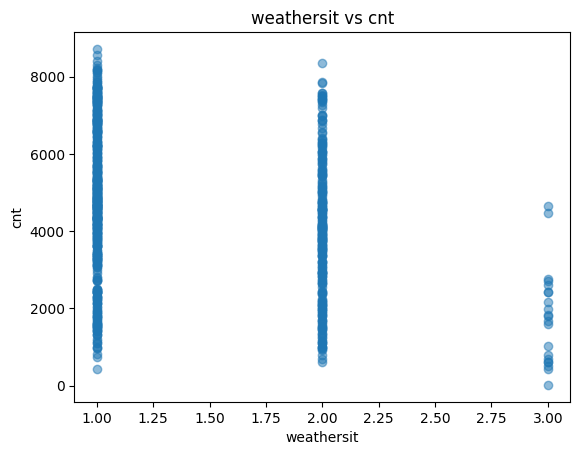

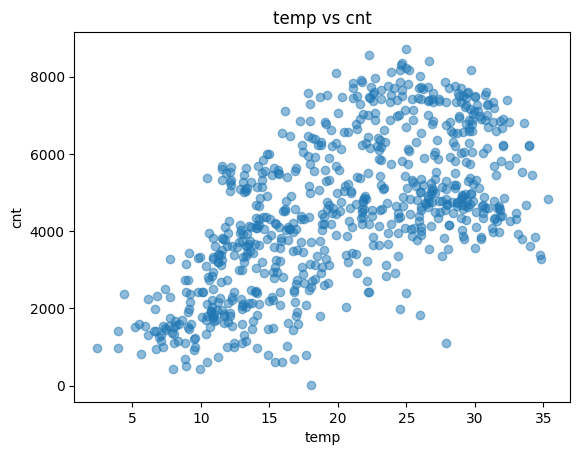

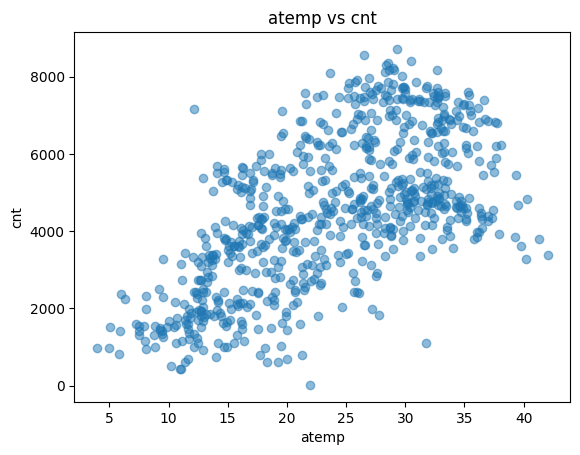

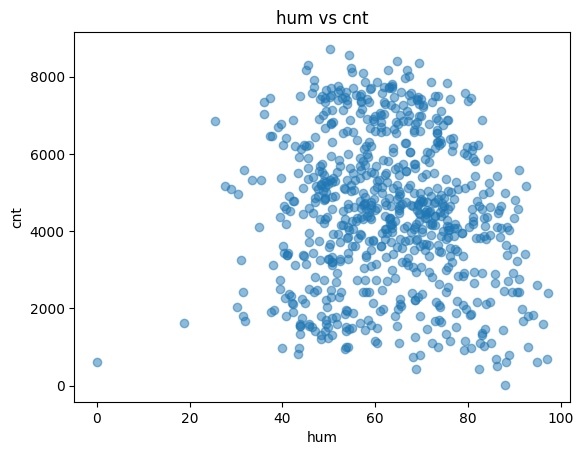

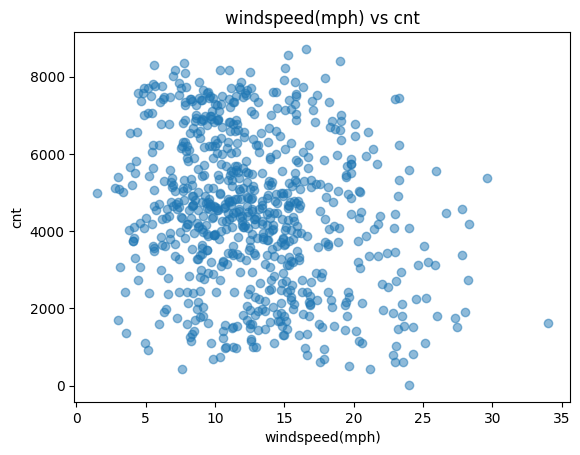

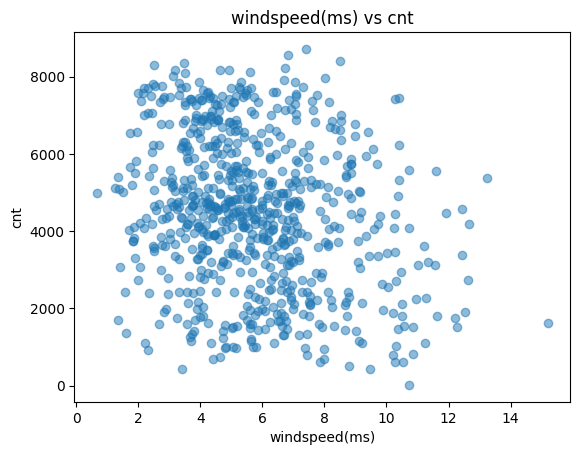

In [3]:
for column in df.columns[:-1]:
    plt.scatter(df[column], df['cnt'], alpha=0.5)
    plt.title(f'{column} vs cnt')
    plt.xlabel(column)
    plt.ylabel('cnt')
    plt.show()

In [4]:
#Завдання 2
columns = df.iloc[:, :-1]
correlations = columns.corrwith(df['cnt'])
print(correlations)

season            0.406100
yr                0.566710
mnth              0.279977
holiday          -0.068348
weekday           0.067443
workingday        0.061156
weathersit       -0.297391
temp              0.627494
atemp             0.631066
hum              -0.100659
windspeed(mph)   -0.234545
windspeed(ms)    -0.234545
dtype: float64


In [5]:
numeric_features = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_features.corr()
print(correlation_matrix)

                  season        yr      mnth   holiday   weekday  workingday  \
season          1.000000 -0.001844  0.831440 -0.010537 -0.003080    0.012485   
yr             -0.001844  1.000000 -0.001792  0.007954 -0.005461   -0.002013   
mnth            0.831440 -0.001792  1.000000  0.019191  0.009509   -0.005901   
holiday        -0.010537  0.007954  0.019191  1.000000 -0.101960   -0.253023   
weekday        -0.003080 -0.005461  0.009509 -0.101960  1.000000    0.035790   
workingday      0.012485 -0.002013 -0.005901 -0.253023  0.035790    1.000000   
weathersit      0.019211 -0.048727  0.043528 -0.034627  0.031087    0.061200   
temp            0.334315  0.047604  0.220205 -0.028556 -0.000170    0.052660   
atemp           0.342876  0.046106  0.227459 -0.032507 -0.007537    0.052182   
hum             0.205445 -0.110651  0.222204 -0.015937 -0.052232    0.024327   
windspeed(mph) -0.229046 -0.011817 -0.207502  0.006292  0.014282   -0.018796   
windspeed(ms)  -0.229046 -0.011817 -0.20

In [6]:
#Завдання 3
selected_list = ['temp', 'atemp', 'hum', 'windspeed(mph)', 'windspeed(ms)', 'cnt']
correlation_matrix = df[selected_list].corr()
print(correlation_matrix)

                    temp     atemp       hum  windspeed(mph)  windspeed(ms)  \
temp            1.000000  0.991702  0.126963       -0.157944      -0.157944   
atemp           0.991702  1.000000  0.139988       -0.183643      -0.183643   
hum             0.126963  0.139988  1.000000       -0.248489      -0.248489   
windspeed(mph) -0.157944 -0.183643 -0.248489        1.000000       1.000000   
windspeed(ms)  -0.157944 -0.183643 -0.248489        1.000000       1.000000   
cnt             0.627494  0.631066 -0.100659       -0.234545      -0.234545   

                     cnt  
temp            0.627494  
atemp           0.631066  
hum            -0.100659  
windspeed(mph) -0.234545  
windspeed(ms)  -0.234545  
cnt             1.000000  


In [7]:
#Завдання 4
values_mean = df.mean()
print(values_mean)

season               2.496580
yr                   0.500684
mnth                 6.519836
holiday              0.028728
weekday              2.997264
workingday           0.683995
weathersit           1.395349
temp                20.310776
atemp               23.717699
hum                 62.789406
windspeed(mph)      12.762576
windspeed(ms)        5.705220
cnt               4504.348837
dtype: float64


In [8]:
#Завдання 5
from sklearn.preprocessing import scale
from sklearn.utils import shuffle
from sklearn.linear_model import LinearRegression
df_shuffled = shuffle(df, random_state=42)
X = scale(df_shuffled[df_shuffled.columns[:-1]])
y = df_shuffled["cnt"]

In [9]:
lin_reg  = LinearRegression().fit(X,y)
results = list(zip(df_shuffled.columns[:-1], lin_reg.coef_))
for feature, result in results:
    print(f"{feature}: {result}")    

season: 570.863641661725
yr: 1021.9604245185086
mnth: -141.3006331900142
holiday: -86.75760471139698
weekday: 137.2272583151452
workingday: 56.38980357474366
weathersit: -330.2271825899341
temp: 367.4799030832653
atemp: 585.5521797658965
hum: -145.6155228231448
windspeed(mph): 12454356291009.727
windspeed(ms): -12454356291208.188


In [10]:
#Завдання 6
from sklearn.linear_model import Ridge, Lasso
lasso_reg = Lasso().fit(X, y)
ridge_reg = Ridge().fit(X, y)

print("Lasso:")
lasso_results = list(zip(df_shuffled.columns[:-1], lasso_reg.coef_))
for feature, result in lasso_results:
    print(f"{feature}: {result}")

print("\nRidge:")
ridge_results = list(zip(df_shuffled.columns[:-1], ridge_reg.coef_))
for feature, result in ridge_results:
    print(f"{feature}: {result}")

Lasso:
season: 560.2416160308861
yr: 1019.4634940657196
mnth: -128.73062703678696
holiday: -86.15278133371106
weekday: 137.34789390496314
workingday: 55.21237064135668
weathersit: -332.3698569623487
temp: 376.3632362096943
atemp: 576.530793504555
hum: -144.12915500348583
windspeed(mph): -197.1396894024843
windspeed(ms): -2.8051404183533485e-08

Ridge:
season: 563.0645722520164
yr: 1018.9483787875275
mnth: -131.87332028247582
holiday: -86.74609799709243
weekday: 138.00511117871926
workingday: 55.90311037506429
weathersit: -332.34978849907236
temp: 386.45788919189926
atemp: 566.3470470600766
hum: -145.0713272986732
windspeed(mph): -99.25944108174306
windspeed(ms): -99.25944115438946


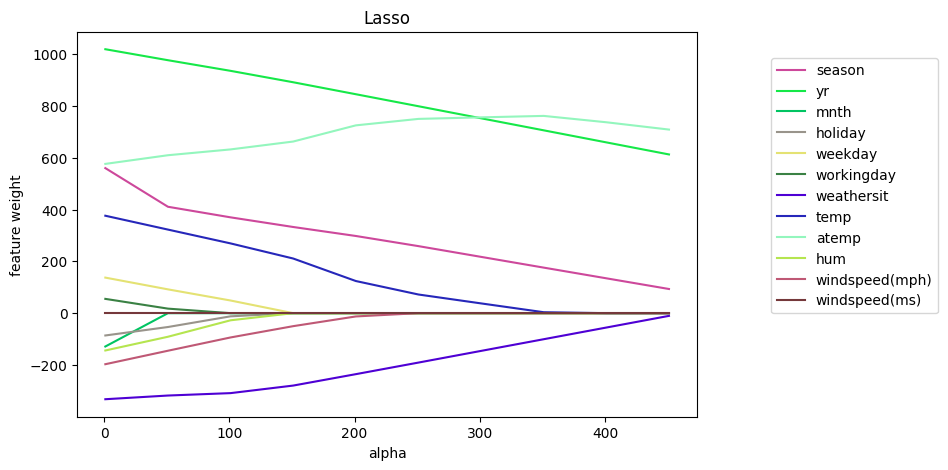

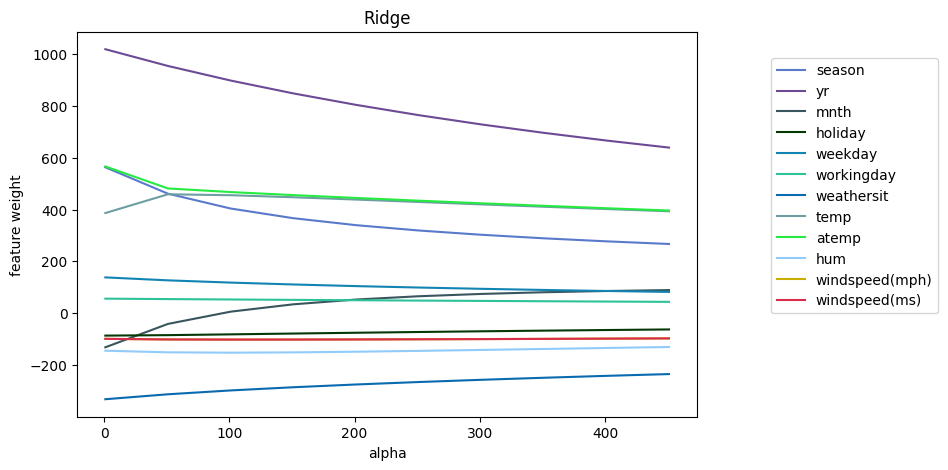

In [11]:
#Завдання 7
alphas = np.arange(1, 500, 50)
coefs_lasso = []
coefs_ridge = []
for alpha in alphas:
    lasso_reg = Lasso(alpha=alpha)
    lasso_reg.fit(X, y)
    coefs_lasso.append(lasso_reg.coef_)

    ridge_reg = Ridge(alpha=alpha)
    ridge_reg.fit(X, y)
    coefs_ridge.append(ridge_reg.coef_)

coefs_lasso = np.array(coefs_lasso)
coefs_ridge = np.array(coefs_ridge)


plt.figure(figsize=(8, 5))

for coef, feature in zip(coefs_lasso.T, df.columns):
    plt.plot(alphas, coef, label=feature, color=np.random.rand(3))

plt.legend(loc="upper right", bbox_to_anchor=(1.4, 0.95))
plt.xlabel("alpha")
plt.ylabel("feature weight")
plt.title("Lasso")

plt.figure(figsize=(8, 5))
for coef, feature in zip(coefs_ridge.T, df.columns):
    plt.plot(alphas, coef, label=feature, color=np.random.rand(3))

plt.legend(loc="upper right", bbox_to_anchor=(1.4, 0.95))
plt.xlabel("alpha")
plt.ylabel("feature weight")
plt.title("Ridge")

plt.show()

In [12]:
# 1)Какой регуляризатор (Ridge или Lasso) агрессивнее уменьшает веса при одном и том же alpha? Lasso
# 2) Что произойдет с весами Lasso, если alpha сделать очень большим? Поясните, почему так происходит. Деякі ваги ознак, виключаться з моелі.
# 3) Можно ли утверждать, что Lasso исключает один из признаков windspeed при любом значении alpha > 0? А Ridge? Считается, что регуляризатор исключает признак, если коэффициент при нем меньше 
# . Ridge не виключає дані з моделі. Lasso, якщо alpha має великі значення.
# 4)Какой из регуляризаторов подойдет для отбора неинформативных признаков? Lasso

In [13]:
#Завдання 8
def create_plot(data, title, xlabel, ylabel, figsize=None):
    size = figsize or (15, 5)
    plt.figure(figsize=size)

    x = list(map(lambda e: e[0], data))
    y = list(map(lambda e: e[1], data))
    plt.plot(x, y)

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    plt.grid()
    plt.show()

Alpha = 6
season: 532.0189828413535
yr: 1015.0602226430595
mnth: -100.03952614356629
holiday: -83.29395987529904
weekday: 132.50446549095795
workingday: 51.557085614073735
weathersit: -330.5598567399817
temp: 370.67985503003405
atemp: 581.396931065498
hum: -140.00740550068844
windspeed(mph): -191.77140847135036
windspeed(ms): -2.6854702314758792e-08


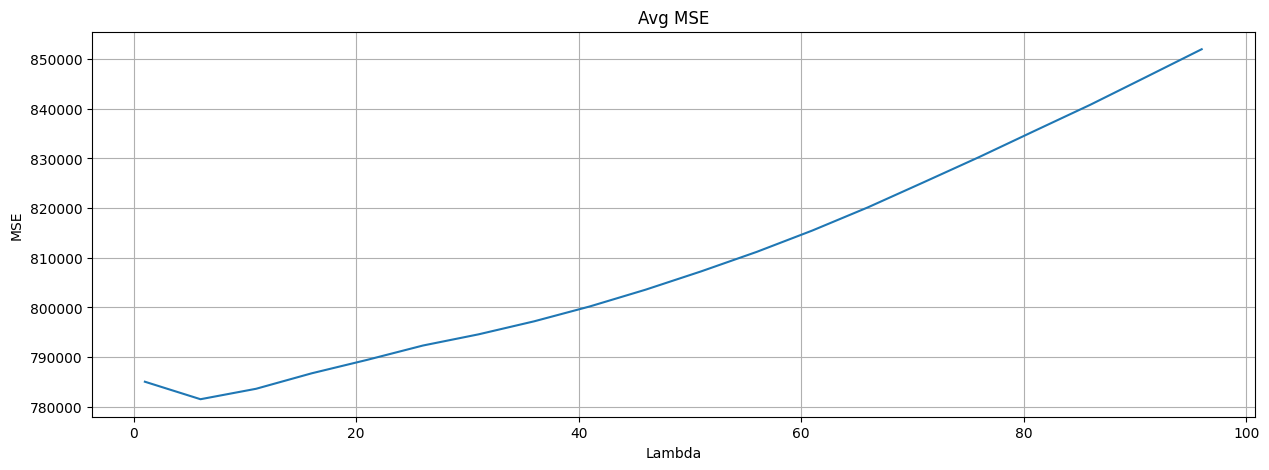

In [14]:
from sklearn.linear_model import LassoCV

alphas = np.arange(1, 100, 5)
regressor = LassoCV(alphas=alphas, cv=3).fit(X,y)
print(f"Alpha = {regressor.alpha_}")
results = list(zip(df_shuffled.columns[:-1], regressor.coef_))
for feature, result in results:
    print(f"{feature}: {result}")
mse = np.mean(regressor.mse_path_, axis=1)
alpha_mse_data = list(zip(regressor.alphas_, mse))
create_plot(alpha_mse_data, "Avg MSE", "Lambda", "MSE")

In [15]:
#Завдання 9
min_alpha_values = regressor.alphas_[np.argmin(regressor.mse_path_, axis=0)]

print("Alphas with minimum MSE:")
for i, alpha in enumerate(min_alpha_values):
    mse = np.min(regressor.mse_path_[:, i])
    print(f"Alpha = {alpha}, MSE = {mse}")

Alphas with minimum MSE:
Alpha = 6, MSE = 733725.7604052245
Alpha = 1, MSE = 799433.1673691699
Alpha = 51, MSE = 796979.8955193633


In [24]:
#Завдання 10
question_1 = sorted(results, key=lambda x: x[1], reverse=True)[:4]
print("Питання 1: ")
for feature, coef in question_1:
    print(f"{feature}: {coef}")
    
question_2 = sorted(results, key=lambda x: x[1])[:3]   
print("\nПитання 2: ")
for feature, coef in question_2:
    print(f"{feature}: {coef}")


question_3 = []
print("\nПитання 3: ")
for feature, coef in results:
    if abs(coef) < 1e-3:
        question_3.append(feature)
print(question_3)

Питання 1: 
yr: 1015.0602226430595
atemp: 581.396931065498
season: 532.0189828413535
temp: 370.67985503003405

Питання 2: 
weathersit: -330.5598567399817
windspeed(mph): -191.77140847135036
hum: -140.00740550068844

Питання 3: 
['windspeed(ms)']
